In [2]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos





/Users/jonah/Desktop/ReinforcementLearning/.venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [3]:
config = {
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
    "policy_frequency": 2
}
env = gymnasium.make('highway-v0', render_mode='rgb_array',max_episode_steps=-1,config=config)
env.unwrapped.action_type.actions_indexes

{'LANE_LEFT': 0, 'IDLE': 1, 'LANE_RIGHT': 2, 'FASTER': 3, 'SLOWER': 4}

In [4]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env,type='cnn')

In [8]:
NUM_EPISODES = 1000
total_rewards = []
discounted_rewards = []

for episode in range(NUM_EPISODES):
    print(f"Episode {episode}")
    
    total_reward = 0
    discounted_reward = 0 
    gamma_pow = 1.0       
    
    done = truncated = False
    obs, info = env.reset()
    
    while not (done or truncated):
        action = agent.predict(obs)

        next_obs, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        
        discounted_reward += reward * gamma_pow
        gamma_pow *= agent.gamma # Decay the discount factor
        
        agent.learn(obs, action, reward, (done, next_obs))

        obs = next_obs
        
    total_rewards.append(total_reward)
    discounted_rewards.append(discounted_reward)
    
    print(f"Total Reward: {round(total_reward, 2)} | Discounted: {round(discounted_reward, 2)}")

Episode 0
Total Reward: 5.73 | Discounted: 3.64
Episode 1
Total Reward: 36.03 | Discounted: 5.44
Episode 2
Total Reward: 6.96 | Discounted: 4.21
Episode 3
Total Reward: 16.71 | Discounted: 5.53
Episode 4
Total Reward: 13.8 | Discounted: 5.32
Episode 5
Total Reward: 26.64 | Discounted: 5.65
Episode 6
Total Reward: 22.59 | Discounted: 5.68
Episode 7
Total Reward: 12.3 | Discounted: 4.99
Episode 8
Total Reward: 37.04 | Discounted: 5.48
Episode 9
Total Reward: 7.48 | Discounted: 4.19
Episode 10
Total Reward: 23.74 | Discounted: 5.65
Episode 11
Total Reward: 13.53 | Discounted: 5.14
Episode 12
Total Reward: 28.53 | Discounted: 5.49
Episode 13
Total Reward: 21.83 | Discounted: 5.68
Episode 14
Total Reward: 41.44 | Discounted: 5.71
Episode 15
Total Reward: 4.87 | Discounted: 3.42
Episode 16
Total Reward: 47.73 | Discounted: 5.47
Episode 17
Total Reward: 36.81 | Discounted: 5.38
Episode 18
Total Reward: 4.63 | Discounted: 3.24
Episode 19
Total Reward: 14.27 | Discounted: 5.15
Episode 20
Total 

KeyboardInterrupt: 

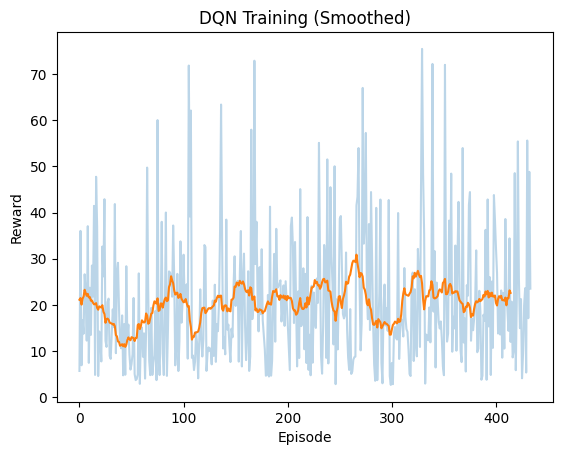

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [7]:
NUM_EPISODES = 30
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config=config)

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  
  while not (done or truncated):
    action = agent.predict(obs)

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 27.80768806989968, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': np.float64(0.780768806989968), 'on_road_reward': 1.0}}
{'speed': 29.038753680227963, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': np.float64(0.9038753680227962), 'on_road_reward': 1.0}}
{'speed': 29.578529645079747, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': np.float64(0.9578529645079747), 'on_road_reward': 1.0}}
{'speed': 29.815201102544943, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': np.float64(0.9815201102544944), 'on_road_reward': 1.0}}
{'speed': 29.91897263448798, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.66666666